# DuckDB on USDA Food Dataset

In [1]:
import duckdb
import pandas as pd
duckdb.sql('SELECT 42').show()

┌───────┐
│  42   │
│ int32 │
├───────┤
│    42 │
└───────┘



In [3]:
db = duckdb.read_csv('FoodData_Central_csv_2022-10-28/food.csv') 

In [11]:
duckdb.sql("""
           SELECT * FROM
           read_csv_auto('FoodData_Central_csv_2022-10-28/food.csv')
           WHERE description like '%taco%'
           """)


┌─────────┬───────────────────┬──────────────────────────────────────────────────┬──────────────────┬──────────────────┐
│ fdc_id  │     data_type     │                   description                    │ food_category_id │ publication_date │
│  int64  │      varchar      │                     varchar                      │     varchar      │       date       │
├─────────┼───────────────────┼──────────────────────────────────────────────────┼──────────────────┼──────────────────┤
│  167657 │ sr_legacy_food    │ ON THE BORDER, soft taco with ground beef, che…  │                  │ 2019-04-01       │
│  167658 │ sr_legacy_food    │ Restaurant, Mexican, soft taco with ground bee…  │                  │ 2019-04-01       │
│  167970 │ sr_legacy_food    │ Snacks, tortilla chips, taco-flavor              │                  │ 2019-04-01       │
│  170689 │ sr_legacy_food    │ Fast foods, taco with beef, cheese and lettuce…  │                  │ 2019-04-01       │
│  170763 │ sr_legacy_food    │ 

In [28]:
result_df = duckdb.sql("""
           SELECT branded_food_category, count(*) as n_foods
           FROM
           read_csv_auto('FoodData_Central_csv_2022-10-28/branded_food.csv')
           GROUP BY branded_food_category
           ORDER BY n_foods DESC
           """).to_df()


In [41]:
df = pd.read_csv('FoodData_Central_csv_2022-10-28/branded_food.csv', low_memory=False)
df2 = df['branded_food_category'].value_counts() \
        .to_frame('n_foods').reset_index() \
            .rename(columns={'index':'branded_food_category'})

# Combine Datasets

In [42]:
from glob import glob

In [47]:
branded_foods = glob('*/branded_food.csv')
nutrient_files = glob('*/nutrient.csv')

In [51]:
branded_foods = pd.read_csv('FoodData_Central_csv_2022-04-28/branded_food.csv', low_memory=False)

In [52]:
nutrients = pd.read_csv('FoodData_Central_csv_2022-04-28/nutrient.csv', low_memory=False)

In [55]:
food_nutrients = pd.read_csv('FoodData_Central_csv_2022-04-28/food_nutrient.csv', low_memory=False)

In [57]:
food_nutrients.shape

(21973286, 12)

In [61]:
fns = pd.read_csv('FoodData_Central_csv_2022-10-28/food_nutrient_source.csv')
fns

,id,code,description
0,1,1,Analytical or derived from analytical
1,2,4,Calculated or imputed
2,3,5,Value manufacturer based label claim for added...
3,4,6,Aggregated data involving combinations of sour...
4,5,7,Assumed zero
5,6,8,Calculated from nutrient label by NDL
6,7,9,"Calculated by manufacturer, not adjusted or ro..."
7,8,11,Aggregated data involving comb. of codes other...
8,9,12,Manufacturer's analytical; partial documentation
9,10,13,"Analytical data from the literature, partial d..."


In [64]:
inv = pd.read_csv('FoodData_Central_csv_2022-10-28/fndds_ingredient_nutrient_value.csv')

In [66]:
inv.head()

,ingredient code,Ingredient description,Nutrient code,Nutrient value,Nutrient value source,FDC ID,Derivation code,SR AddMod year,Foundation year acquired,Start date,End date
0,1001,"Butter, stick, salted",203,0.85,SR Legacy,173410.0,NaN,1976.0,0,2019-01-0,2020-12-3
1,1001,"Butter, stick, salted",204,82.20,Foundation,790508.0,A,NaN,2019,2019-01-0,2020-12-3
2,1001,"Butter, stick, salted",205,0.06,SR Legacy,173410.0,NC,1976.0,0,2019-01-0,2020-12-3
3,1001,"Butter, stick, salted",208,743.00,Informed by FDC Foundation and SR Legacy,NaN,NaN,NaN,0,2019-01-0,2020-12-3
4,1001,"Butter, stick, salted",221,0.00,SR Legacy,173410.0,NaN,1985.0,0,2019-01-0,2020-12-3


In [70]:
nutrients

,id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957.0,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958.0,290.0
2,1001,Solids,G,201.0,200.0
3,1002,Nitrogen,G,202.0,500.0
4,1003,Protein,G,203.0,600.0
...,...,...,...,...,...
469,2061,"Ergosta-7,22-dienol",MG,NaN,16211.0
470,2062,"Ergosta-5,7-dienol",MG,NaN,16211.0
471,2063,Verbascose,G,NaN,2450.0
472,2064,Oligiosaccharides,MG,NaN,2250.0


In [78]:
branded_foods.loc[branded_foods['brand_owner'].str.contains('cheez its').fillna(False)]

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel


In [82]:
foods = pd.read_csv('FoodData_Central_csv_2022-10-28/food.csv')

In [104]:
foods.loc[foods['description'].str.lower().str.contains('cheez-it').fillna(False)].sort_values('description')

,fdc_id,data_type,description,food_category_id,publication_date
221781,509348,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2019-04-01
1051235,1600184,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2021-03-19
759123,1308072,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2021-02-26
1329351,1914267,branded_food,"CHEEZ-IT BAKED SNACK CRACKERS, CHEESE",NaN,2021-07-29
248776,536343,branded_food,CHEEZ-IT BAKED SNACKS CRACKERS,NaN,2019-04-01
...,...,...,...,...,...
390981,750892,branded_food,Sunshine Cheez-It Crackers Whole Grain 1oz,NaN,2020-02-27
57198,344765,branded_food,Sunshine Cheez-It Crackers Whole Grain 48oz 4ct,NaN,2019-04-01
391122,751174,branded_food,Sunshine Cheez-It Crackers Whole Grain 48oz 4ct,NaN,2020-02-27
391956,752846,branded_food,Sunshine Right Bites Cheez-It Crackers Party M...,NaN,2020-02-27


In [108]:
foods.loc[foods['description'] == 'CHEEZ-IT BAKED SNACK CRACKERS'].sort_values('publication_date')

,fdc_id,data_type,description,food_category_id,publication_date
221781,509348,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2019-04-01
759123,1308072,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2021-02-26
1051235,1600184,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2021-03-19


In [100]:
foods.loc[foods['fdc_id'].isin(branded_foods['fdc_id'])]['data_type'].value_counts()

branded_food    1626603
Name: data_type, dtype: int64

In [110]:
branded_foods = branded_foods.merge(foods, how='left', validate='1:1', on='fdc_id')

In [114]:
pd.set_option('display.max_columns', 500)

In [116]:
branded_foods.query('fdc_id == 1600184')

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,data_type,description,food_category_id,publication_date
1022894,1600184,"Sunshine Biscuits, Inc.",SUNSHINE,NaN,024100940219,"ENRICHED FLOUR (WHEAT FLOUR, NIACIN, REDUCED I...",NaN,28.0,g,NaN,Flavored Snack Crackers,LI,NaN,2017-07-14,2021-03-19,United States,NaN,NaN,NaN,branded_food,CHEEZ-IT BAKED SNACK CRACKERS,NaN,2021-03-19


In [125]:
ings =branded_foods.query('gtin_upc == "024100940219"')['ingredients'].values[0].split(', ')
[i.title() for i in ings]

['Enriched Flour (Wheat Flour',
 'Niacin',
 'Reduced Iron',
 'Thiamin Mononitrate',
 '[Vitamin B1]',
 'Riboflavin [Vitamin B2]',
 'Folic Acid)',
 'Vegetable Oil (Soybean And Palm Oil With Tbhq For Freshness)',
 'Cheese Made With Skim Milk (Skim Milk',
 'Whey Protein',
 'Cheese Cultures',
 'Salt',
 'Enzymes',
 'Annatto Extract For Color)',
 'Contains Two Percent Or Less Of Salt',
 'Yeast Extract',
 'Paprika',
 'Yeast',
 'Paprika Oleoresin For Color',
 'Soy Lecithin.']

In [136]:
food_nutrients.query('fdc_id == 1600184')['derivation_id'].value_counts()

70.0    10
75.0     5
73.0     1
Name: derivation_id, dtype: int64

In [144]:
food_nutrients.query('fdc_id == 1600184 and derivation_id == 73')

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,loq,footnote,min_year_acquired
13707984,17806962,1600184,1079,3.6,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
nutrients.query('id == 1079')

,id,name,unit_name,nutrient_nbr,rank
80,1079,"Fiber, total dietary",G,291.0,1200.0


In [133]:
food_nutrient_derivation = pd.read_csv('FoodData_Central_csv_2022-10-28/food_nutrient_derivation.csv')

# food_nutrient_derivation
- 70: 'Calculated from value per serving size measure'
- 75: 'Calculated from a daily value percentage per serving size measure'
- 73: 'Calculated from a less than value per serving size measure'

In [142]:
food_nutrient_derivation.query('id == 73')['description'].values[0]

'Calculated from a less than value per serving size measure'

In [158]:
nutrients.query('id == 1003')

,id,name,unit_name,nutrient_nbr,rank
4,1003,Protein,G,203.0,600.0


In [160]:
food_nutrients = food_nutrients.merge(nutrients, left_on=['nutrient_id'], right_on=['id'], how='left', validate='m:1')

In [164]:
food_nutrients.query('fdc_id == 1600184')[['nutrient_id','name','amount','unit_name','derivation_id']]

,nutrient_id,name,amount,unit_name,derivation_id
13707980,1087,"Calcium, Ca",71.00,MG,75.0
13707981,1005,"Carbohydrate, by difference",67.86,G,70.0
13707982,1093,"Sodium, Na",821.00,MG,70.0
13707983,1003,Protein,14.29,G,70.0
13707984,1079,"Fiber, total dietary",3.60,G,73.0
13707985,1008,Energy,464.00,KCAL,70.0
13707986,1004,Total lipid (fat),14.29,G,70.0
13707987,1104,"Vitamin A, IU",357.00,IU,75.0
13707988,1089,"Iron, Fe",3.86,MG,75.0
13707989,2000,"Sugars, total including NLEA",0.00,G,70.0


In [167]:
food_nutrients.query('nutrient_id == 1008 and unit_name == "KCAL" and derivation_id == 70') \
        .sort_values('amount', ascending=False)

,id_x,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,loq,footnote,min_year_acquired,id_y,name,unit_name,nutrient_nbr,rank
15557413,20347895,1736365,1008,43200.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
20769372,26369915,2164508,1008,43200.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
449066,13764246,1138853,1008,43200.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
11663970,16861634,1423664,1008,39600.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
20633017,24765523,2154275,1008,39600.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371424,20046315,1722718,1008,0.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
15371667,20046495,1722737,1008,0.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
15371767,20713059,1722745,1008,0.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0
15371769,20001405,1722746,1008,0.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.0,Energy,KCAL,208.0,300.0


In [169]:
 = food_nutrients.query('nutrient_id == 1008 and unit_name == "KCAL" and derivation_id == 70').copy()kcals

<AxesSubplot: ylabel='Frequency'>

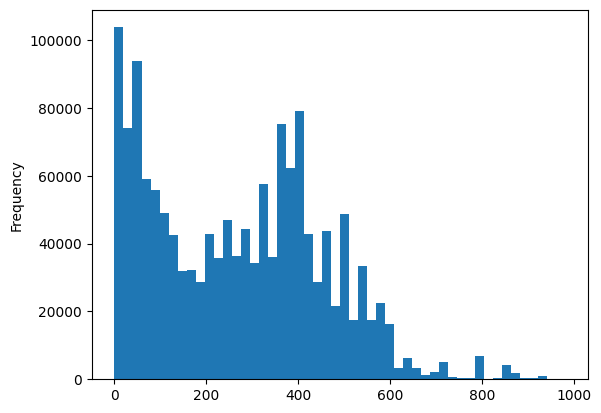

In [178]:
kcals.query('amount < 1000')['amount'].plot(kind='hist', bins=50)

In [183]:
kcals = kcals.query('amount < 1000').sort_values('amount', ascending=False) \
        .merge(branded_foods, on='fdc_id', validate='m:1')

In [193]:
kcals.columns

Index(['id_x', 'fdc_id', 'nutrient_id', 'amount', 'data_points',
       'derivation_id', 'min', 'max', 'median', 'loq', 'footnote',
       'min_year_acquired', 'id_y', 'name', 'unit_name', 'nutrient_nbr',
       'rank', 'brand_owner', 'brand_name', 'subbrand_name', 'gtin_upc',
       'ingredients', 'not_a_significant_source_of', 'serving_size',
       'serving_size_unit', 'household_serving_fulltext',
       'branded_food_category', 'data_source', 'package_weight',
       'modified_date', 'available_date', 'market_country',
       'discontinued_date', 'preparation_state_code', 'trade_channel',
       'data_type', 'description', 'food_category_id', 'publication_date'],
      dtype='object')

In [197]:
%load_ext lab_black

In [199]:
kcals[
    [
        "gtin_upc",
        "description",
        "brand_owner",
        "brand_name",
        "subbrand_name",
        "amount",
        "unit_name",
        "package_weight",
        "name",
        "ingredients",
        #     'id_x',
        #  'fdc_id',
        #  'nutrient_id',
        #  'data_points',
        #  'derivation_id',
        #  'min',
        #  'max',
        #  'median',
        #  'loq',
        #  'footnote',
        #  'min_year_acquired',
        #  'id_y',
        #  'nutrient_nbr',
        #  'rank',
        #  'not_a_significant_source_of',
        #  'serving_size',
        #  'serving_size_unit',
        #  'household_serving_fulltext',
        #  'branded_food_category',
        #  'data_source',
        #  'modified_date',
        #  'available_date',
        #  'market_country',
        #  'discontinued_date',
        #  'preparation_state_code',
        #  'trade_channel',
        #  'data_type',
        #  'food_category_id',
        #  'publication_date'
    ]
].head(50)

70.0    1455927
71.0      34833
78.0      17740
49.0       6803
73.0       1401
72.0        568
47.0        417
77.0        186
44.0        136
56.0        131
65.0         64
62.0         32
20.0         24
57.0         24
63.0         18
51.0         17
40.0         16
1.0          16
46.0         14
58.0         13
67.0          8
39.0          6
74.0          4
41.0          3
18.0          1
16.0          1
53.0          1
43.0          1
55.0          1
52.0          1
60.0          1
Name: derivation_id, dtype: int64

In [212]:
kcals = food_nutrients.query(
    'nutrient_id == 1008 and unit_name == "KCAL" and derivation_id == 71'
).copy()
kcals = (
    kcals.query("amount < 1000")
    .sort_values("amount", ascending=False)
    .merge(branded_foods, on="fdc_id", validate="m:1")
)

In [215]:
kcals[
    [
        "gtin_upc",
        "description",
        "brand_owner",
        "brand_name",
        "subbrand_name",
        "amount",
        "unit_name",
        "package_weight",
        "name",
        "ingredients",
    ]
].head(10)

,gtin_upc,description,brand_owner,brand_name,subbrand_name,amount,unit_name,package_weight,name,ingredients
0,00071537010077,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CI..."
1,00071537010145,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER,HIGH FRUCTOSE CORN SYRUP,CITR..."
2,00071537010145,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER,HIGH FRUCTOSE CORN SYRUP,CITR..."
3,00071537010145,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER,HIGH FRUCTOSE CORN SYRUP,CITR..."
4,00071537010077,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CI..."
5,00071537010077,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CI..."
6,00071537010077,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CI..."
7,00071537010145,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER,HIGH FRUCTOSE CORN SYRUP,CITR..."
8,00071537010077,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CI..."
9,00071537010145,Aluminum Can,POLAR BEVERAGES,POLAR,NaN,933.0,KCAL,222 MLT,Energy,"CARBONATED WATER,HIGH FRUCTOSE CORN SYRUP,CITR..."
